# Capstone Phase 2  
Let's plot some results from our tests.  First, we'll load the classification reports.

## Import libraries

In [14]:
from google.colab import files
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Upload data files

In [2]:
ig_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_ig.pkl')

Saving rep_dict_ann_adamax_ig.pkl to rep_dict_ann_adamax_ig.pkl


In [3]:
anova_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_anova.pkl')

Saving rep_dict_ann_adamax_anova.pkl to rep_dict_ann_adamax_anova.pkl


In [4]:
vt_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_vt.pkl')

Saving rep_dict_ann_adamax_vt.pkl to rep_dict_ann_adamax_vt.pkl


In [5]:
mad_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_mad.pkl')

Saving rep_dict_ann_adamax_mad.pkl to rep_dict_ann_adamax_mad.pkl


In [6]:
corr_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_corr.pkl')

Saving rep_dict_ann_adamax_corr.pkl to rep_dict_ann_adamax_corr.pkl


In [7]:
RF_rep_pkl = files.upload() # joblib.load('./data/rep_dict_ann_adamax_RF.pkl')

Saving rep_dict_ann_adamax_RF.pkl to rep_dict_ann_adamax_RF.pkl


## Load Classification Reports

In [10]:
rep_dict_ann_adamax_ig = joblib.load('rep_dict_ann_adamax_ig.pkl')
rep_dict_ann_adamax_anova = joblib.load('rep_dict_ann_adamax_anova.pkl')
rep_dict_ann_adamax_vt = joblib.load('rep_dict_ann_adamax_vt.pkl')
rep_dict_ann_adamax_mad = joblib.load('rep_dict_ann_adamax_mad.pkl')
rep_dict_ann_adamax_corr = joblib.load('rep_dict_ann_adamax_corr.pkl')
rep_dict_ann_adamax_RF = joblib.load('rep_dict_ann_adamax_RF.pkl')

## Plot F1 Scores  
Let's look at the class F1 scores from each feature subset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

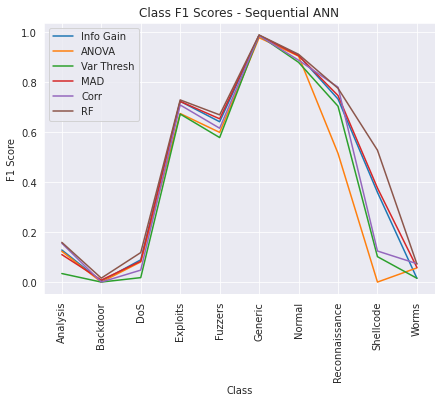

In [13]:
ann_reports = [rep_dict_ann_adamax_ig, rep_dict_ann_adamax_anova, rep_dict_ann_adamax_vt, 
               rep_dict_ann_adamax_mad, rep_dict_ann_adamax_corr, rep_dict_ann_adamax_RF]
ann_lgnds = ['Info Gain', 'ANOVA', 'Var Thresh', 'MAD', 'Corr', 'RF']
labels = ['0', '1', '2', '3','4', '5', '6', '7', '8', '9']
class_names = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 
               'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')

for report, lgnd in zip(ann_reports, ann_lgnds):
    f1_scores = []
    for lab in labels:
        f1_scores.append(report[lab]['f1-score'])
    sns.lineplot(x=class_names, y=f1_scores, label=lgnd)
plt.xlabel('Class')
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('F1 Score')
plt.title('Class F1 Scores - Sequential ANN')
plt.legend()
plt.savefig('class_f1s_ann.png', dpi=300, bbox_inches='tight')
files.download('class_f1s_ann.png')
plt.show()

## Plot Accuracy  
Plot accuracy and weighted average F1 scores for each feature subset.

In [15]:
# let's grab come metrics so we can plot them togther
ann_acc = [('Accuracy', 'Info Gain', rep_dict_ann_adamax_ig['accuracy']),
           ('Accuracy', 'ANOVA', rep_dict_ann_adamax_anova['accuracy']),
           ('Accuracy', 'Var Thresh', rep_dict_ann_adamax_vt['accuracy']),
           ('Accuracy', 'MAD', rep_dict_ann_adamax_mad['accuracy']),
           ('Accuracy', 'Corr', rep_dict_ann_adamax_corr['accuracy']),
           ('Accuracy', 'RF', rep_dict_ann_adamax_RF['accuracy']),
           ('Weighted Avg F1', 'Info Gain', rep_dict_ann_adamax_ig['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'ANOVA', rep_dict_ann_adamax_anova['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'Var Thresh', rep_dict_ann_adamax_vt['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'MAD', rep_dict_ann_adamax_mad['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'Corr', rep_dict_ann_adamax_corr['weighted avg']['f1-score']),
           ('Weighted Avg F1', 'RF', rep_dict_ann_adamax_RF['weighted avg']['f1-score'])]
ann_metric_df = pd.DataFrame(ann_acc, columns=['Metric', 'Feature Subset', 'Score'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

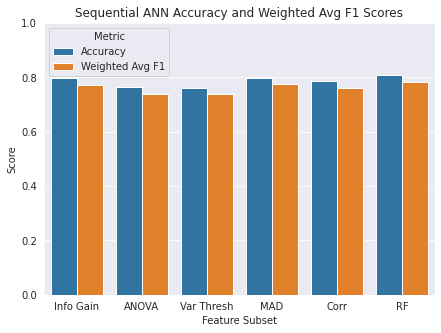

In [16]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
ann_metric_chart = sns.barplot(x='Feature Subset', y='Score', hue='Metric', data=ann_metric_df)
ann_metric_chart.set_title('Sequential ANN Accuracy and Weighted Avg F1 Scores')
plt.ylim(ymax=1.0)
plt.savefig('feat_subset_acc_f1_ann.png', dpi=300, bbox_inches='tight')
files.download('feat_subset_acc_f1_ann.png')
plt.show()

## Plot final results

### Naive Bayes reports

In [ ]:
# classification reports
final_rep_dict_gnb_ig = joblib.load('./data/final_rep_dict_gnb_ig.pkl')
final_rep_dict_gnb_anova = joblib.load('./data/final_rep_dict_gnb_anova.pkl')
final_rep_dict_gnb_vt = joblib.load('./data/final_rep_dict_gnb_vt.pkl')
final_rep_dict_gnb_mad = joblib.load('./data/final_rep_dict_gnb_mad.pkl')
final_rep_dict_gnb_corr = joblib.load('./data/final_rep_dict_gnb_corr.pkl')
final_rep_dict_gnb_RF = joblib.load('./data/final_rep_dict_gnb_RF.pkl')

In [ ]:
# confusion matrices
final_conf_mat_gnb_ig = joblib.load('./data/final_conf_mat_gnb_ig.pkl')
final_conf_mat_gnb_anova = joblib.load('./data/final_conf_mat_gnb_anova.pkl')
final_conf_mat_gnb_vt = joblib.load('./data/final_conf_mat_gnb_vt.pkl')
final_conf_mat_gnb_mad = joblib.load('./data/final_conf_mat_gnb_mad.pkl')
final_conf_mat_gnb_corr = joblib.load('./data/final_conf_mat_gnb_corr.pkl')
final_conf_mat_gnb_RF = joblib.load('./data/final_conf_mat_gnb_RF.pkl')

### K Nearest Neighbors reports

In [ ]:
# classification reports
final_rep_dict_knn_ig = joblib.load('./data/final_rep_dict_knn_ig.pkl')
final_rep_dict_knn_anova = joblib.load('./data/final_rep_dict_knn_anova.pkl')
final_rep_dict_knn_vt = joblib.load('./data/final_rep_dict_knn_vt.pkl')
final_rep_dict_knn_mad = joblib.load('./data/final_rep_dict_knn_mad.pkl')
final_rep_dict_knn_corr = joblib.load('./data/final_rep_dict_knn_corr.pkl')
final_rep_dict_knn_RF = joblib.load('./data/final_rep_dict_knn_RF.pkl')

In [ ]:
# confusion matrices
final_conf_mat_knn_ig = joblib.load('./data/final_conf_mat_knn_ig.pkl')
final_conf_mat_knn_anova = joblib.load('./data/final_conf_mat_knn_anova.pkl')
final_conf_mat_knn_vt = joblib.load('./data/final_conf_mat_knn_vt.pkl')
final_conf_mat_knn_mad = joblib.load('./data/final_conf_mat_knn_mad.pkl')
final_conf_mat_knn_corr = joblib.load('./data/final_conf_mat_knn_corr.pkl')
final_conf_mat_knn_RF = joblib.load('./data/final_conf_mat_knn_RF.pkl')

### SVM reports

In [2]:
# classification reports
final_rep_dict_svc_ig = joblib.load('./data/final_rep_dict_svc_ig.pkl')
final_rep_dict_svc_anova = joblib.load('./data/final_rep_dict_svc_anova.pkl')
final_rep_dict_svc_vt = joblib.load('./data/final_rep_dict_svc_vt.pkl')
final_rep_dict_svc_mad = joblib.load('./data/final_rep_dict_svc_mad.pkl')
final_rep_dict_svc_corr = joblib.load('./data/final_rep_dict_svc_corr.pkl')
final_rep_dict_svc_RF = joblib.load('./data/final_rep_dict_svc_RF.pkl')

In [ ]:
# confusion matrices
final_conf_mat_svc_ig = joblib.load('./data/final_conf_mat_svc_ig.pkl')
final_conf_mat_svc_anova = joblib.load('./data/final_conf_mat_svc_anova.pkl')
final_conf_mat_svc_vt = joblib.load('./data/final_conf_mat_svc_vt.pkl')
final_conf_mat_svc_mad = joblib.load('./data/final_conf_mat_svc_mad.pkl')
final_conf_mat_svc_corr = joblib.load('./data/final_conf_mat_svc_corr.pkl')
final_conf_mat_svc_RF = joblib.load('./data/final_conf_mat_svc_RF.pkl')

### Random Forest reports

In [ ]:
# classification reports
final_rep_dict_rf_ig = joblib.load('./data/final_rep_dict_rf_ig.pkl')
final_rep_dict_rf_vt = joblib.load('./data/final_rep_dict_rf_vt.pkl')
final_rep_dict_rf_mad = joblib.load('./data/final_rep_dict_rf_mad.pkl')
final_rep_dict_rf_corr = joblib.load('./data/final_rep_dict_rf_corr.pkl')
final_rep_dict_rf_rfe = joblib.load('./data/final_rep_dict_rf_rfe.pkl')
final_rep_dict_rf_RF = joblib.load('./data/final_rep_dict_rf_RF.pkl')
final_rep_dict_rf_all = joblib.load('./data/final_rep_dict_rf_all.pkl')

In [ ]:
# confusion matrices
final_conf_mat_rf_ig = joblib.load('./data/final_conf_mat_rf_ig.pkl')
final_conf_mat_rf_vt = joblib.load('./data/final_conf_mat_rf_vt.pkl')
final_conf_mat_rf_mad = joblib.load('./data/final_conf_mat_rf_mad.pkl')
final_conf_mat_rf_corr = joblib.load('./data/final_conf_mat_rf_corr.pkl')
final_conf_mat_rf_rfe = joblib.load('./data/final_conf_mat_rf_rfe.pkl')
final_conf_mat_rf_RF = joblib.load('./data/final_conf_mat_rf_RF.pkl')
final_conf_mat_rf_all = joblib.load('./data/final_conf_mat_rf_all.pkl')

### ANN reports

In [ ]:
# classification reports
final_rep_dict_ann_ig = joblib.load('./data/final_rep_dict_ann_ig.pkl')
final_rep_dict_ann_anova = joblib.load('./data/final_rep_dict_ann_anova.pkl')
final_rep_dict_ann_vt = joblib.load('./data/final_rep_dict_ann_vt.pkl')
final_rep_dict_ann_mad = joblib.load('./data/final_rep_dict_ann_mad.pkl')
final_rep_dict_ann_corr = joblib.load('./data/final_rep_dict_ann_corr.pkl')
final_rep_dict_ann_RF = joblib.load('./data/final_rep_dict_ann_RF.pkl')

In [ ]:
# confusion matrices
final_conf_mat_ann_ig = joblib.load('./data/final_conf_mat_ann_ig.pkl')
final_conf_mat_ann_anova = joblib.load('./data/final_conf_mat_ann_anova.pkl')
final_conf_mat_ann_vt = joblib.load('./data/final_conf_mat_ann_vt.pkl')
final_conf_mat_ann_mad = joblib.load('./data/final_conf_mat_ann_mad.pkl')
final_conf_mat_ann_corr = joblib.load('./data/final_conf_mat_ann_corr.pkl')
final_conf_mat_ann_RF = joblib.load('./data/final_conf_mat_ann_RF.pkl')

In [ ]:
# optuna model classification reports
final_rep_dict_ann_ig_optuna = joblib.load('./data/final_rep_dict_ann_ig_optuna.pkl')
final_rep_dict_ann_anova_optuna = joblib.load('./data/final_rep_dict_ann_anova_optuna.pkl')
final_rep_dict_ann_vt_optuna = joblib.load('./data/final_rep_dict_ann_vt_optuna.pkl')
final_rep_dict_ann_mad_optuna = joblib.load('./data/final_rep_dict_ann_mad_optuna.pkl')
final_rep_dict_ann_corr_optuna = joblib.load('./data/final_rep_dict_ann_corr_optuna.pkl')
final_rep_dict_ann_RF_optuna = joblib.load('./data/final_rep_dict_ann_RF_optuna.pkl')
final_rep_dict_ann_full_optuna = joblib.load('./data/final_rep_dict_ann_full_optuna.pkl')

In [ ]:
# optuna model confusion matrices
final_conf_mat_ann_ig_optuna = joblib.load('./data/final_conf_mat_ann_ig_optuna.pkl')
final_conf_mat_ann_anova_optuna = joblib.load('./data/final_conf_mat_ann_anova_optuna.pkl')
final_conf_mat_ann_vt_optuna = joblib.load('./data/final_conf_mat_ann_vt_optuna.pkl')
final_conf_mat_ann_mad_optuna = joblib.load('./data/final_conf_mat_ann_mad_optuna.pkl')
final_conf_mat_ann_corr_optuna = joblib.load('./data/final_conf_mat_ann_corr_optuna.pkl')
final_conf_mat_ann_RF_optuna = joblib.load('./data/final_conf_mat_ann_RF_optuna.pkl')
final_conf_mat_ann_full_optuna = joblib.load('./data/final_conf_mat_ann_full_optuna.pkl')